# Forest Management Problem - pymdptoolbox

In [1]:
import numpy as np
from hiive.mdptoolbox.example import forest
from hiive.mdptoolbox import mdp
import matplotlib.pyplot as plt
import json

## Value Iteration

In [15]:
def value_iteration(P, R, iterations, gamma=0.95):
    vi = mdp.ValueIteration(P, R, gamma, max_iter=iterations)
    return vi.run()

def perform_value_iteration_exp_problem_size():
    runs = {}
    for problem_size in [1000, 5000, 10000, 15000, 20000]:
        print("Iteration:", problem_size)
        
        prob, reward = forest(S=problem_size)
        run = value_iteration(prob, reward, 100)
        runs[problem_size] = run
    with open("ForestManagement-VI.json", "a+") as f:
        json.dump(runs, f, indent=4)


In [20]:
def value_iteration_experiments_gamma():
    runs = {}
    for gamma in [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]:
        print("Gamma:", gamma)
        prob, reward = forest(S=5000)
        run = value_iteration(prob, reward, 100, gamma=gamma)
        runs[gamma] = run
    with open("ForestManagement-Gamma.json", "a+") as f:
        json.dump(runs, f, indent=4)

In [18]:
perform_value_iteration_exp_problem_size()

Iteration: 1000
Iteration: 5000
Iteration: 10000
Iteration: 15000
Iteration: 20000


In [21]:
value_iteration_experiments_gamma()

Gamma: 0.4
Gamma: 0.45
Gamma: 0.5
Gamma: 0.55
Gamma: 0.6
Gamma: 0.65
Gamma: 0.7
Gamma: 0.75
Gamma: 0.8
Gamma: 0.85
Gamma: 0.9
Gamma: 0.95
Gamma: 1.0


In [22]:
policy, reward = forest(S=100)
vi = mdp.ValueIteration(policy, reward, max_iter=100, gamma=0.95)
vi.run()
vi_policy = vi.policy
vi_value = vi.V

## Policy Iteration

In [23]:
def policy_iteration(P, R, iterations, gamma=0.95):
    pi = mdp.PolicyIteration(P, R, gamma, max_iter=iterations)
    return pi.run()

def perform_policy_iteration_exp_problem_size():
    runs = {}
    for problem_size in [1000, 5000, 10000, 15000, 20000]:
        print("Iteration:", problem_size)
        prob, reward = forest(S=problem_size)
        run = policy_iteration(prob, reward, 100)
        runs[problem_size] = run
    with open("ForestManagement-PI.json", "a+") as f:
        json.dump(runs, f, indent=4)

In [28]:
def policy_iteration_experiments_gamma():
    runs = {}
    for gamma in [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.999999]:
        print("Gamma:", gamma)
        prob, reward = forest(S=5000)
        run = policy_iteration(prob, reward, 100, gamma=gamma)
        runs[gamma] = run
    with open("ForestManagement-Gamma-PI.json", "a+") as f:
        json.dump(runs, f, indent=4)

In [27]:
perform_policy_iteration_exp_problem_size()

Iteration: 1000
Iteration: 5000
Iteration: 10000
Iteration: 15000
Iteration: 20000
Gamma: 0.4
Gamma: 0.45
Gamma: 0.5
Gamma: 0.55
Gamma: 0.6
Gamma: 0.65
Gamma: 0.7
Gamma: 0.75
Gamma: 0.8
Gamma: 0.85
Gamma: 0.9
Gamma: 0.95
Gamma: 1.0


In [29]:
policy_iteration_experiments_gamma()

Gamma: 0.4
Gamma: 0.45
Gamma: 0.5
Gamma: 0.55
Gamma: 0.6
Gamma: 0.65
Gamma: 0.7
Gamma: 0.75
Gamma: 0.8
Gamma: 0.85
Gamma: 0.9
Gamma: 0.95
Gamma: 0.999999


In [30]:
policy, reward = forest(S=100)
pi = mdp.PolicyIteration(policy, reward, max_iter=100, gamma=0.95)
pi.run()
pi_policy = pi.policy
pi_value = pi.V

## Q-Learning

In [117]:
def convert(o):
    if isinstance(o, np.int64): return int(o)  
    else: return o
    
def q_learning(P, R, iterations, gamma=0.95, alpha=0.1, epsilon_decay=0.99):
    ql = mdp.QLearning(P, R, gamma, n_iter=iterations, alpha=alpha, epsilon_decay=epsilon_decay)
    return ql.run()

def perform_q_learning_exp_problem_size():
    runs = {}
    for problem_size in [1000, 5000, 10000, 15000, 20000]:
        print("Iteration:", problem_size)
        prob, reward = forest(S=problem_size)
        run = q_learning(prob, reward, 100000)
        runs[problem_size] = run
    with open("ForestManagement-QL.json", "a+") as f:
        json.dump(runs, f, indent=4, default=convert)

In [35]:
def q_learning_experiments_gamma():
    runs = {}
    for gamma in [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]:
        print("Gamma:", gamma)
        prob, reward = forest(S=5000)
        run = q_learning(prob, reward, 100000, gamma=gamma)
        runs[gamma] = run
    with open("ForestManagement-Gamma-QL.json", "a+") as f:
        json.dump(runs, f, indent=4, default=convert)

In [151]:
def q_learning_experiments_alpha():
    runs = {}
    for alpha in np.arange(0.1, 0.4, 0.1):
        print("Alpha:", alpha)
        prob, reward = forest(S=5000)
        run = q_learning(prob, reward, 100000, alpha=alpha)
        runs[alpha] = run
    with open("ForestManagement-alpha-QL.json", "a+") as f:
        json.dump(runs, f, indent=4, default=convert)
        
def q_learning_experiments_epsilon_decay():
    runs = {}
    for epd in [0.99, 0.95, 0.8, 0.75]:
        print("Epsilon_decay:", epd)
        prob, reward = forest(S=5000)
        run = q_learning(prob, reward, 100000, epsilon_decay=epd)
        runs[epd] = run
    with open("ForestManagement-epsilon-decay-QL.json", "a+") as f:
        json.dump(runs, f, indent=4, default=convert)

In [33]:
perform_q_learning_exp_problem_size()

Iteration: 1000
Iteration: 5000
Iteration: 10000
Iteration: 15000
Iteration: 20000


In [152]:
q_learning_experiments_gamma()

Gamma: 0.4
Gamma: 0.45
Gamma: 0.5
Gamma: 0.55
Gamma: 0.6
Gamma: 0.65
Gamma: 0.7
Gamma: 0.75
Gamma: 0.8
Gamma: 0.85
Gamma: 0.9
Gamma: 0.95
Gamma: 1.0


In [153]:
q_learning_experiments_alpha()
q_learning_experiments_epsilon_decay()

Alpha: 0.1
Alpha: 0.2
Alpha: 0.30000000000000004
Alpha: 0.4
Epsilon_decay: 0.99
Epsilon_decay: 0.95
Epsilon_decay: 0.8
Epsilon_decay: 0.75


In [37]:
policy, reward = forest(S=100)
ql = mdp.QLearning(policy, reward, n_iter=100000, gamma=0.95)
ql.run()
ql_policy = ql.policy
ql_value = ql.V

## Visualization

#### Value Iteration - Metrics

No handles with labels found to put in legend.
No handles with labels found to put in legend.


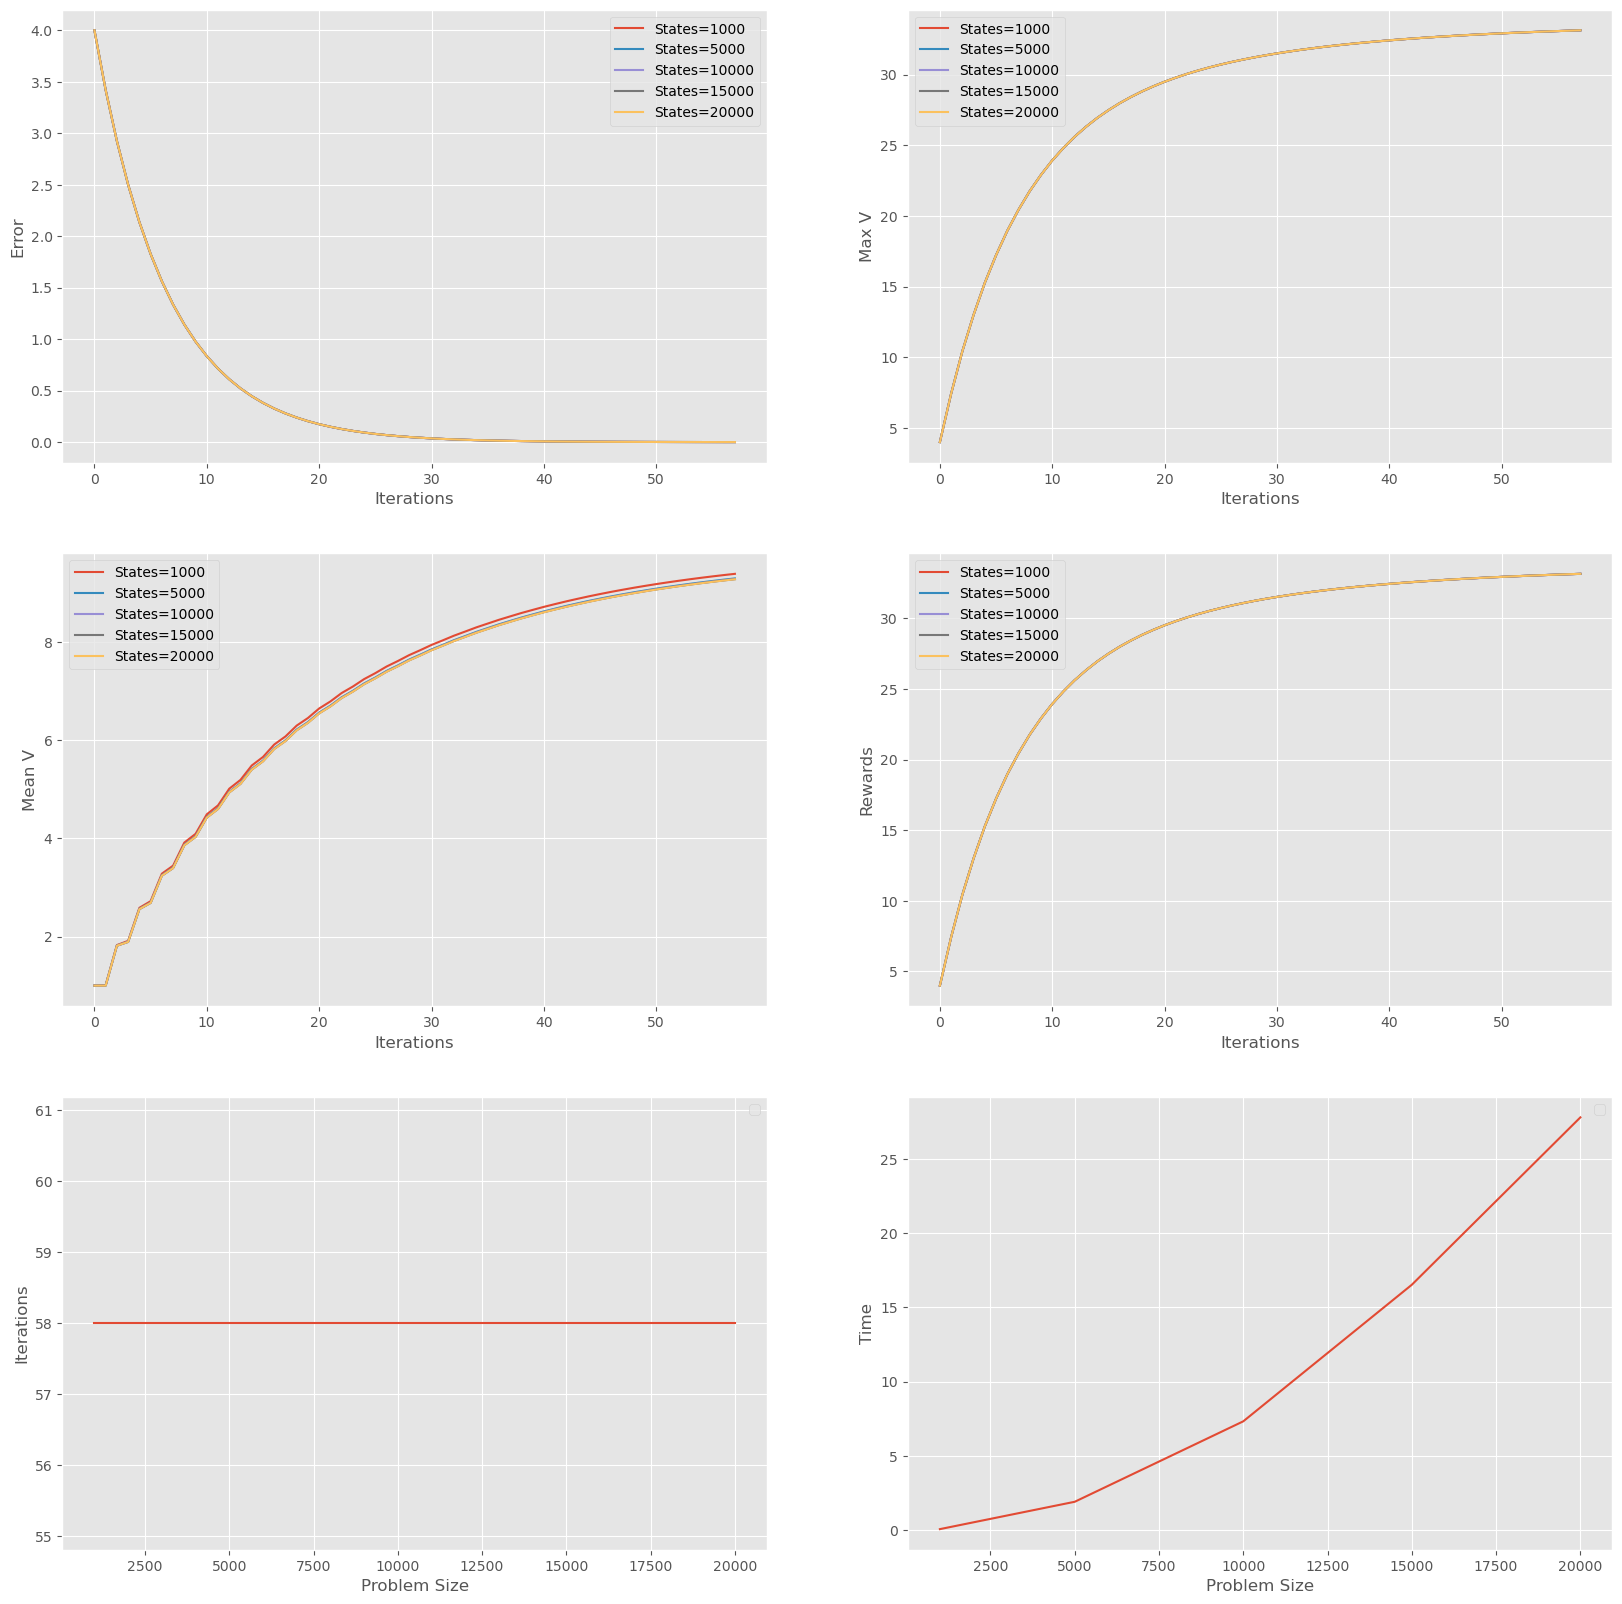

In [196]:
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
numbering = ['a', 'b', 'c', 'd', 'e', 'f']
with open("ForestManagement-VI.json") as f:
    vl_val = json.load(f)
    iterations = []
    time = []
    rewards = {}
    meanvs = {}
    maxvs = {}
    errors = {}
    for prob_size, values in vl_val.items():
        iterations.append(values[-1]['Iteration'])
        time.append(values[-1]['Time'])
        
        reward = []
        meanv = []
        maxv = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            meanv.append(value['Mean V'])
            maxv.append(value['Max V'])
            error.append(value['Error'])

        rewards[prob_size] = reward
        meanvs[prob_size] = meanv
        maxvs[prob_size] = maxv
        errors[prob_size] = error
    
    for problem_size in [1000, 5000, 10000, 15000, 20000]:
        problem_size = str(problem_size)
        label = f"States={problem_size}"
        ax[0][0].plot(errors[problem_size], label=label)
        ax[0][1].plot(maxvs[problem_size], label=label)
        ax[1][0].plot(meanvs[problem_size], label=label)
        ax[1][1].plot(rewards[problem_size], label=label)
        
        ax[0][0].set_xlabel('Iterations')
        ax[0][0].set_ylabel('Error')
        ax[0][1].set_xlabel('Iterations')
        ax[0][1].set_ylabel('Max V')
        ax[1][0].set_xlabel('Iterations')
        ax[1][0].set_ylabel('Mean V')
        ax[1][1].set_xlabel('Iterations')
        ax[1][1].set_ylabel('Rewards')
        
        
    ax[2][0].plot([1000, 5000, 10000, 15000, 20000], iterations)
    ax[2][1].plot([1000, 5000, 10000, 15000, 20000], time)
    
    ax[2][0].set_xlabel('Problem Size')
    ax[2][0].set_ylabel('Iterations')
    ax[2][1].set_xlabel('Problem Size')
    ax[2][1].set_ylabel('Time')
    
    for i in range(0, 3):
        for j in range(0, 2):
            ax[i][j].legend(loc="best")

#### Policy Iteration - Metrics

No handles with labels found to put in legend.
No handles with labels found to put in legend.


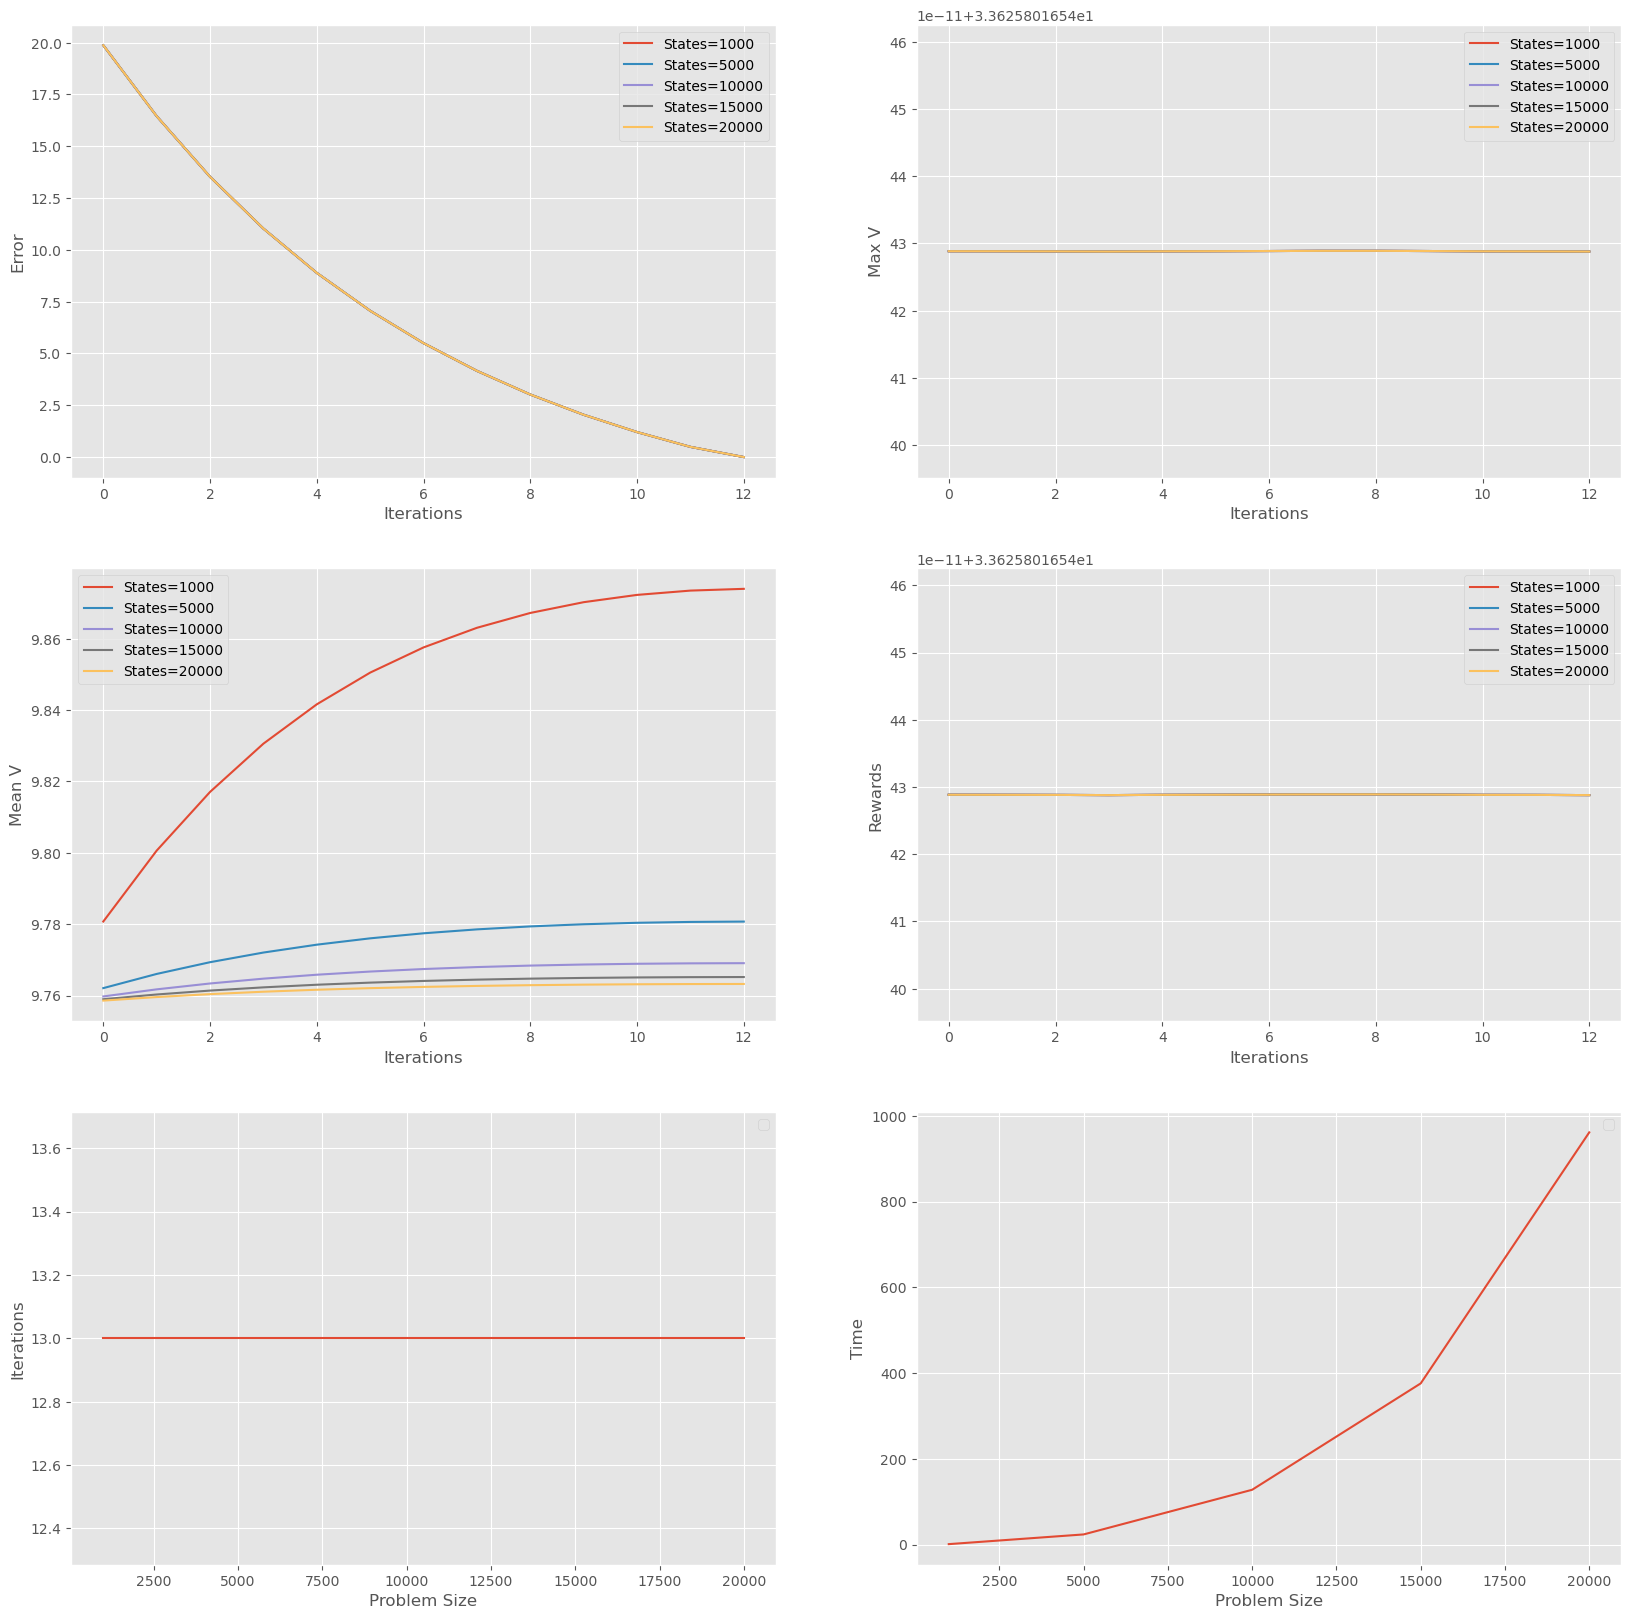

In [197]:
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
with open("ForestManagement-PI.json") as f:
    vl_val = json.load(f)
    iterations = []
    time = []
    rewards = {}
    meanvs = {}
    maxvs = {}
    errors = {}
    for prob_size, values in vl_val.items():
        iterations.append(values[-1]['Iteration'])
        time.append(values[-1]['Time'])
        
        reward = []
        meanv = []
        maxv = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            meanv.append(value['Mean V'])
            maxv.append(value['Max V'])
            error.append(value['Error'])

        rewards[prob_size] = reward
        meanvs[prob_size] = meanv
        maxvs[prob_size] = maxv
        errors[prob_size] = error
    
    for problem_size in [1000, 5000, 10000, 15000, 20000]:
        problem_size = str(problem_size)
        label = f"States={problem_size}"
        ax[0][0].plot(errors[problem_size], label=label)
        ax[0][1].plot(maxvs[problem_size], label=label)
        ax[1][0].plot(meanvs[problem_size], label=label)
        ax[1][1].plot(rewards[problem_size], label=label)
        
        ax[0][0].set_xlabel('Iterations')
        ax[0][0].set_ylabel('Error')
        ax[0][1].set_xlabel('Iterations')
        ax[0][1].set_ylabel('Max V')
        ax[1][0].set_xlabel('Iterations')
        ax[1][0].set_ylabel('Mean V')
        ax[1][1].set_xlabel('Iterations')
        ax[1][1].set_ylabel('Rewards')
        
    ax[2][0].plot([1000, 5000, 10000, 15000, 20000], iterations)
    ax[2][1].plot([1000, 5000, 10000, 15000, 20000], time)
     
    ax[2][0].set_xlabel('Problem Size')
    ax[2][0].set_ylabel('Iterations')
    ax[2][1].set_xlabel('Problem Size')
    ax[2][1].set_ylabel('Time')
    
    for i in range(0, 3):
        for j in range(0, 2):
            ax[i][j].legend(loc="best")

#### Q-Learning - Metrics

No handles with labels found to put in legend.
No handles with labels found to put in legend.


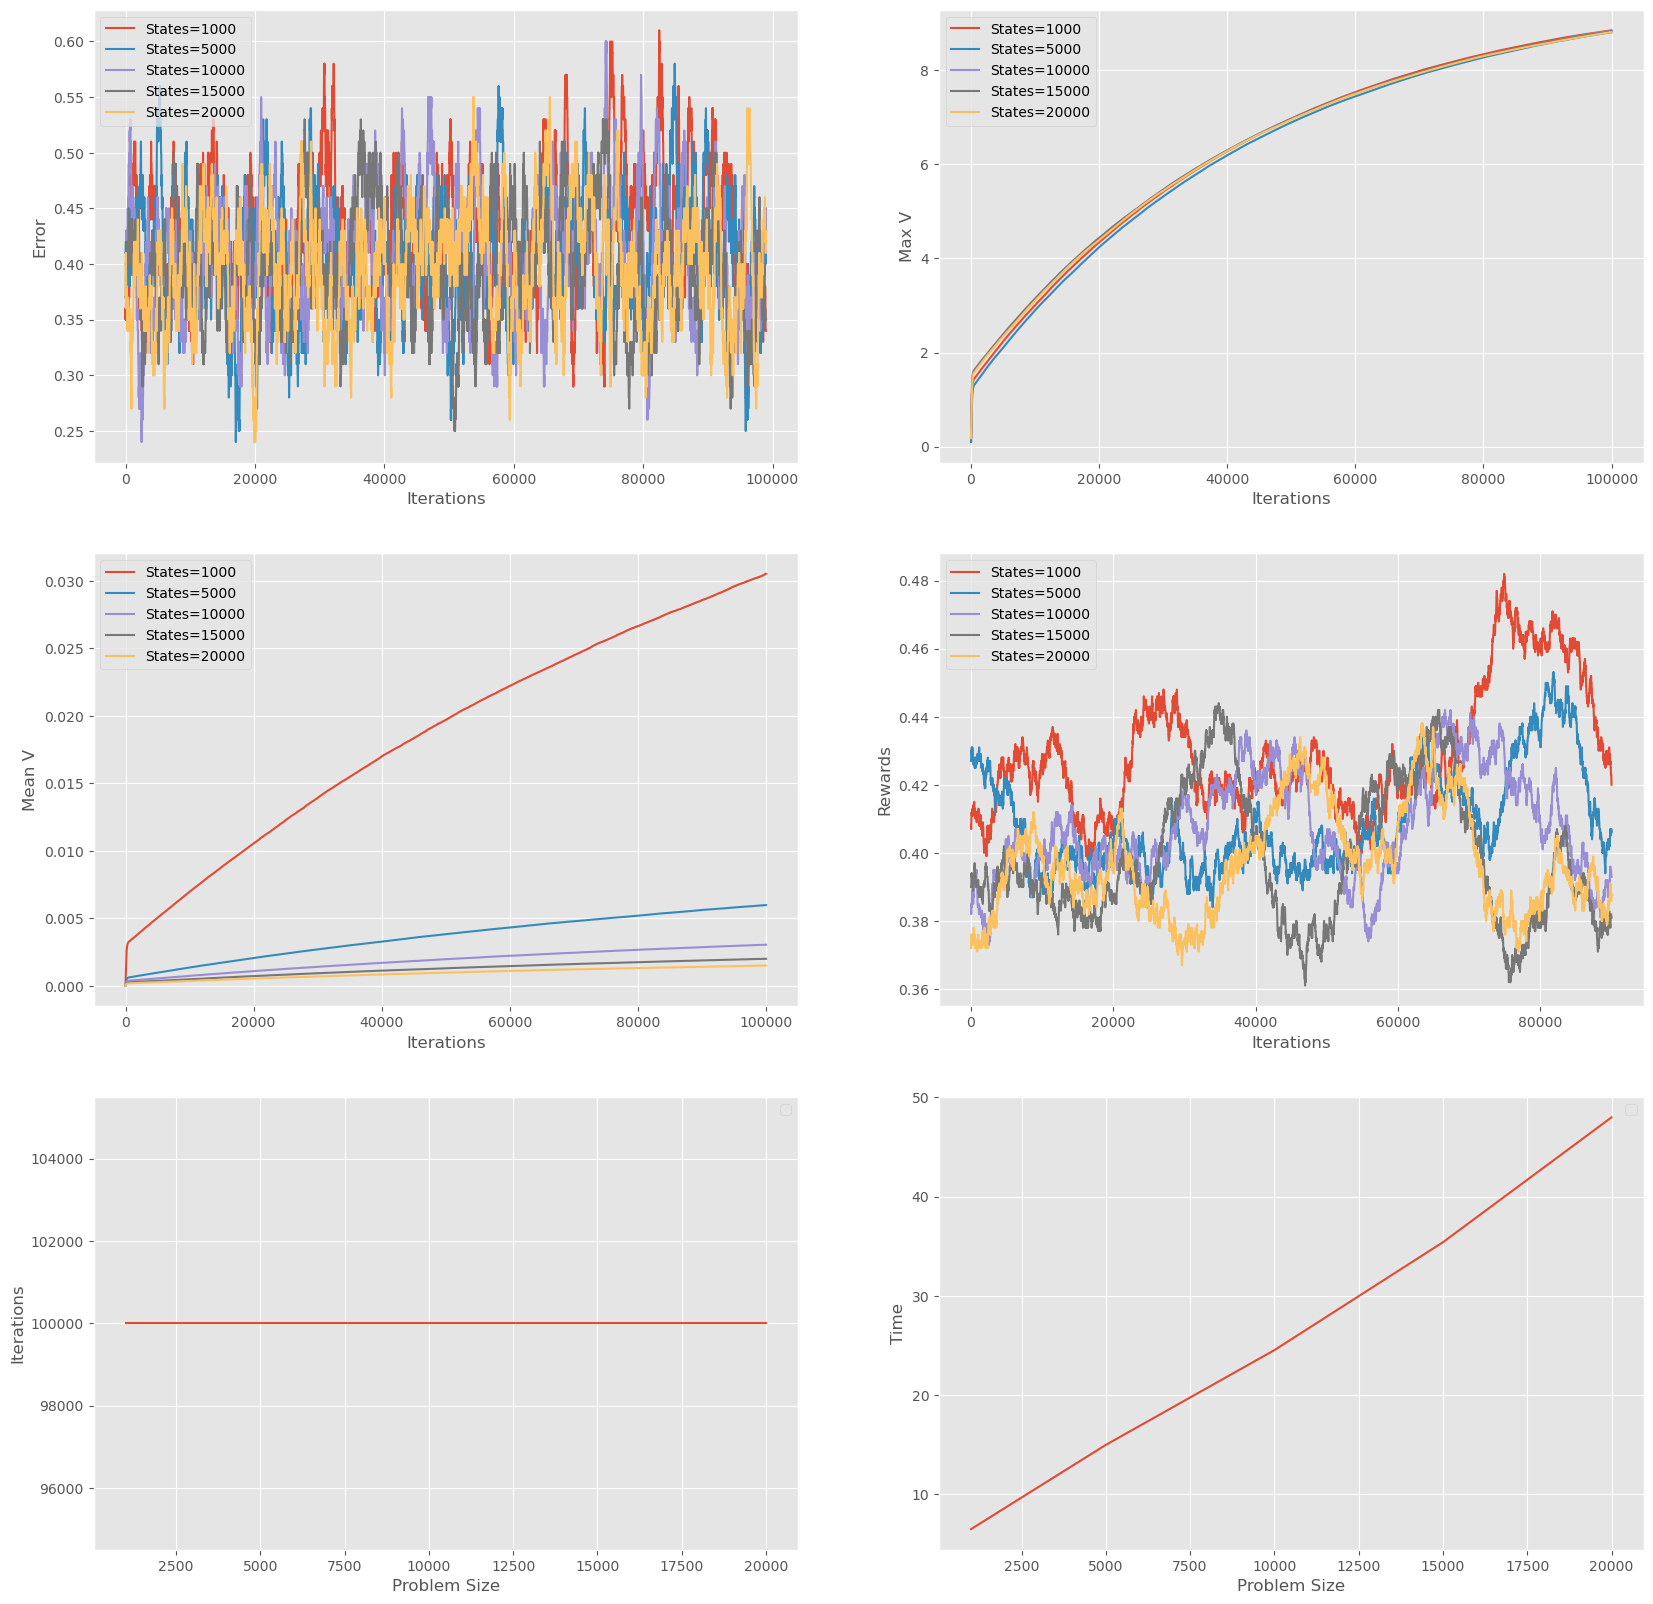

In [198]:
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
with open("ForestManagement-QL.json") as f:
    vl_val = json.load(f)
    iterations = []
    time = []
    rewards = {}
    meanvs = {}
    maxvs = {}
    errors = {}
    for prob_size, values in vl_val.items():
        iterations.append(values[-1]['Iteration'])
        time.append(values[-1]['Time'])
        
        reward = []
        meanv = []
        maxv = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            meanv.append(value['Mean V'])
            maxv.append(value['Max V'])
            error.append(value['Error'])

        rewards[prob_size] = reward
        meanvs[prob_size] = meanv
        maxvs[prob_size] = maxv
        errors[prob_size] = error
    
    for problem_size in [1000, 5000, 10000, 15000, 20000]:
        problem_size = str(problem_size)
        label = f"States={problem_size}"
        ax[0][0].plot(range(0, 99010, 10), np.convolve(rewards[problem_size], np.ones((100,))/100, mode='valid'), label=label)
        ax[0][1].plot(range(0, 100000, 10), maxvs[problem_size], label=label)
        ax[1][0].plot(range(0, 100000, 10), meanvs[problem_size], label=label)
        ax[1][1].plot(range(0, 90010, 10), np.convolve(rewards[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
        
        ax[0][0].set_xlabel('Iterations')
        ax[0][0].set_ylabel('Error')
        ax[0][1].set_xlabel('Iterations')
        ax[0][1].set_ylabel('Max V')
        ax[1][0].set_xlabel('Iterations')
        ax[1][0].set_ylabel('Mean V')
        ax[1][1].set_xlabel('Iterations')
        ax[1][1].set_ylabel('Rewards')
        
    ax[2][0].plot([1000, 5000, 10000, 15000, 20000], iterations)
    ax[2][1].plot([1000, 5000, 10000, 15000, 20000], time)
    
    ax[2][0].set_xlabel('Problem Size')
    ax[2][0].set_ylabel('Iterations')
    ax[2][1].set_xlabel('Problem Size')
    ax[2][1].set_ylabel('Time')    
    for i in range(0, 3):
        for j in range(0, 2):
            ax[i][j].legend(loc="best")

## Gamma
### Value Iteration

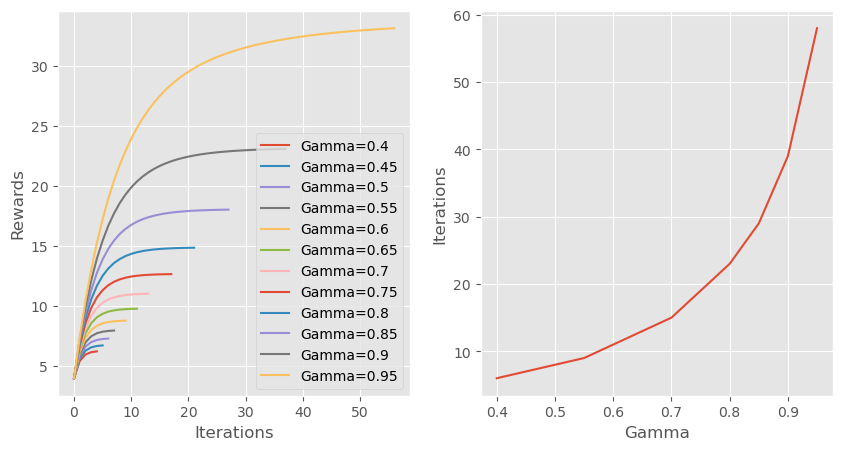

In [194]:
plt.style.use('ggplot')

gammas = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
with open("ForestManagement-Gamma.json") as f:
    vl_val = json.load(f)
    rewards = {}
    iterations = []
    for gamma, values in vl_val.items():
        iterations.append(values[-1]['Iteration'])
        reward = []
        for value in values:
            reward.append(value['Reward'])
        rewards[gamma] = reward
    
    for problem_size in gammas:
        problem_size = str(problem_size)
        label = f"Gamma={problem_size}"
        ax[0].plot(rewards[problem_size][:-1], label=label)
    ax[1].plot(gammas, iterations[:-1])
    ax[0].set_xlabel('Iterations')
    ax[0].set_ylabel('Rewards')
    ax[1].set_xlabel('Gamma')
    ax[1].set_ylabel('Iterations')

    ax[0].legend(loc="best")

### Policy Iteration

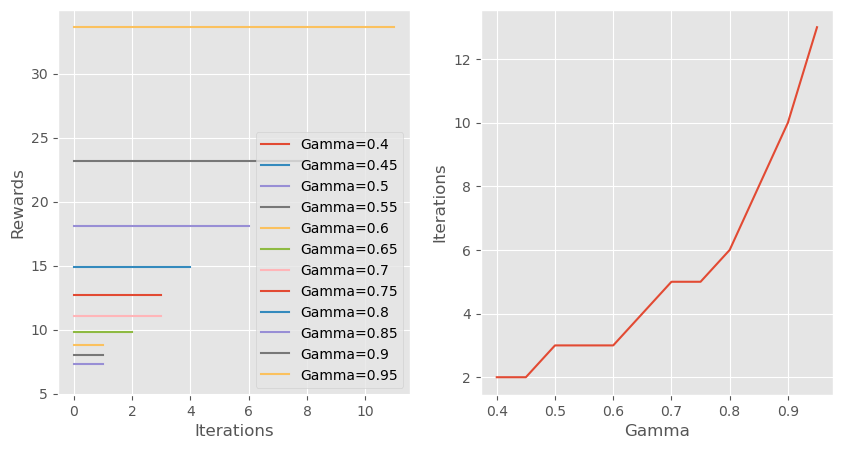

In [195]:
plt.style.use('ggplot')

gammas = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
with open("ForestManagement-Gamma-PI.json") as f:
    vl_val = json.load(f)
    rewards = {}
    iterations = []
    for gamma, values in vl_val.items():
        iterations.append(values[-1]['Iteration'])
        reward = []
        for value in values:
            reward.append(value['Reward'])
        rewards[gamma] = reward
    
    for problem_size in gammas:
        problem_size = str(problem_size)
        label = f"Gamma={problem_size}"
        ax[0].plot(rewards[problem_size][:-1], label=label)
    ax[1].plot(gammas, iterations[:-1])
    ax[0].set_xlabel('Iterations')
    ax[0].set_ylabel('Rewards')
    ax[1].set_xlabel('Gamma')
    ax[1].set_ylabel('Iterations')

    ax[0].legend(loc="best")

### QLearning

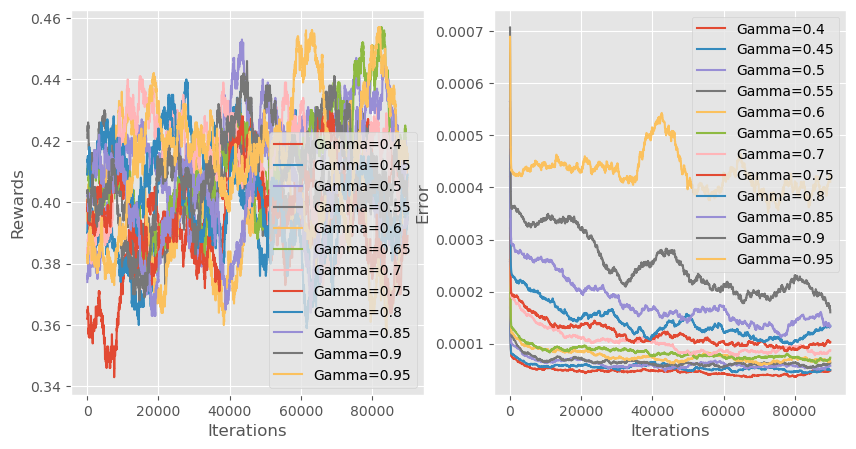

In [181]:
plt.style.use('ggplot')

gammas = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
with open("ForestManagement-Gamma-QL.json") as f:
    vl_val = json.load(f)
    rewards = {}
    error = {}
    for gamma, values in vl_val.items():
        if gamma == '1.0':
            break
        
        reward = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            error.append(value['Error'])
        rewards[gamma] = reward
        errors[gamma] = error
        
    for problem_size in gammas:
        problem_size = str(problem_size)
        label = f"Gamma={problem_size}"
        ax[0].plot(range(0, 90010, 10), np.convolve(rewards[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
        ax[0].set_xlabel('Iterations')
        ax[0].set_ylabel('Rewards')
        ax[1].plot(range(0, 90010, 10), np.convolve(errors[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
        ax[1].set_xlabel('Iterations')
        ax[1].set_ylabel('Error')
        
    ax[0].legend(loc="best")
    ax[1].legend(loc="best")

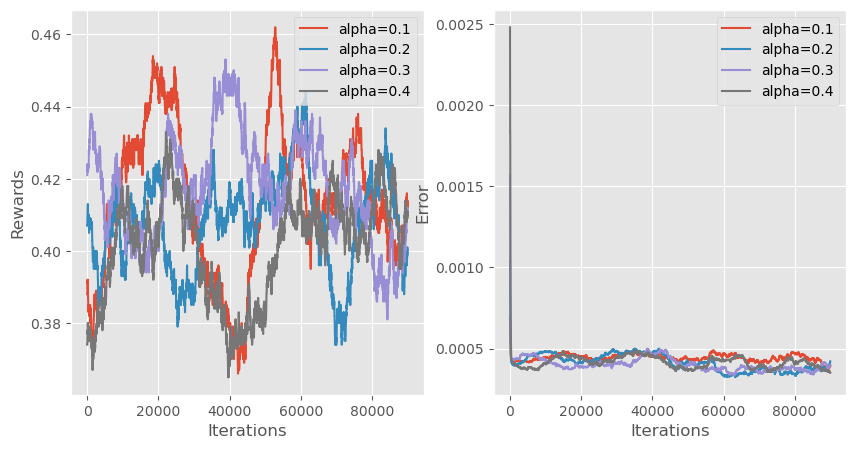

In [187]:
plt.style.use('ggplot')

alphas = np.arange(0.1, 0.4, 0.1)
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
with open("ForestManagement-alpha-QL.json") as f:
    vl_val = json.load(f)
    rewards = {}
    error = {}
    for alpha, values in vl_val.items():
        
        reward = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            error.append(value['Error'])
        rewards[alpha] = reward
        errors[alpha] = error
        
    for problem_size in alphas:
        problem_size = str(problem_size)
        label = f"alpha={round(eval(problem_size), 2)}"
        ax[0].plot(range(0, 90010, 10), np.convolve(rewards[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
        ax[0].set_xlabel('Iterations')
        ax[0].set_ylabel('Rewards')
        ax[1].plot(range(0, 90010, 10), np.convolve(errors[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
        ax[1].set_xlabel('Iterations')
        ax[1].set_ylabel('Error')
        
    ax[0].legend(loc="best")
    ax[1].legend(loc="best")

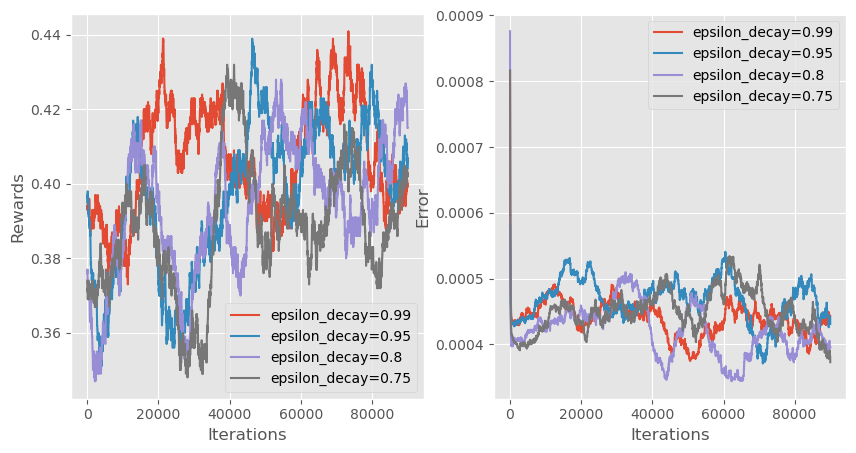

In [189]:
plt.style.use('ggplot')

epds = [0.99, 0.95, 0.8, 0.75]
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
with open("ForestManagement-epsilon-decay-QL.json") as f:
    vl_val = json.load(f)
    rewards = {}
    error = {}
    for epd, values in vl_val.items():
        
        reward = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            error.append(value['Error'])
        rewards[epd] = reward
        errors[epd] = error
        
    for problem_size in epds:
        problem_size = str(problem_size)
        label = f"epsilon_decay={round(eval(problem_size), 2)}"
        ax[0].plot(range(0, 90010, 10), np.convolve(rewards[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
        ax[0].set_xlabel('Iterations')
        ax[0].set_ylabel('Rewards')
        ax[1].plot(range(0, 90010, 10), np.convolve(errors[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
        ax[1].set_xlabel('Iterations')
        ax[1].set_ylabel('Error')
        
    ax[0].legend(loc="best")
    ax[1].legend(loc="best")

Text(0.5, 1.0, 'Q Learning')

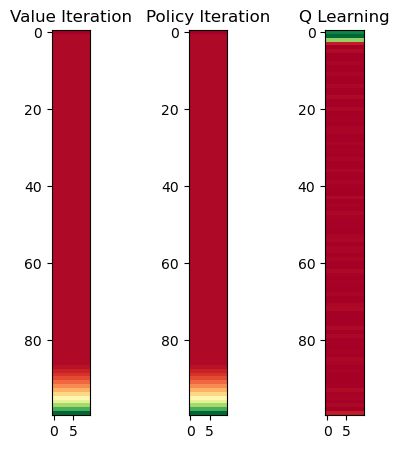

In [110]:
width = 10
fix, ax = plt.subplots(ncols=3, figsize=(5, 5))
ax[0].imshow(np.repeat(vi_value, width).reshape(-1, width), cmap='RdYlGn')
ax[0].set_title("Value Iteration")
ax[1].imshow(np.repeat(pi_value, width).reshape(-1, width), cmap='RdYlGn')
ax[1].set_title("Policy Iteration")
ax[2].imshow(np.repeat(ql_value, width).reshape(-1, width), cmap='RdYlGn')
ax[2].set_title("Q Learning")

Text(0.5, 1.0, 'Q Learning')

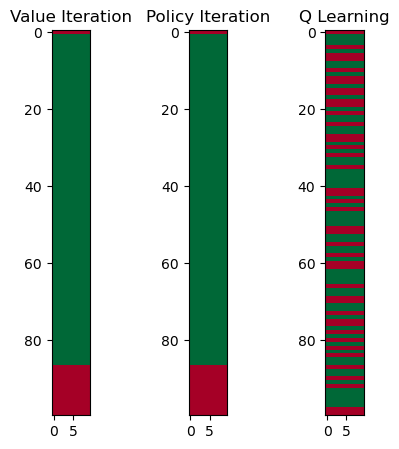

In [111]:
width = 10
fix, ax = plt.subplots(ncols=3, figsize=(5, 5))
ax[0].imshow(np.repeat(vi_policy, width).reshape(-1, width), cmap='RdYlGn')
ax[0].set_title("Value Iteration")
ax[1].imshow(np.repeat(pi_policy, width).reshape(-1, width), cmap='RdYlGn')
ax[1].set_title("Policy Iteration")
ax[2].imshow(np.repeat(ql_policy, width).reshape(-1, width), cmap='RdYlGn')
ax[2].set_title("Q Learning")